<a href="https://colab.research.google.com/github/PerfectionistAF/CVD_Risk/blob/main/StageOneTables_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datapackage
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.0 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10747 sha256=87a59cf4a77630489f7ab5d43c2a7bf1ec33e745beb8e6546382aff44360767e
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
  Created

In [ ]:
from datapackage import Package
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Prerparation**

In [ ]:
#importing data from the package

package = Package('https://datahub.io/machine-learning/heart-statlog/datapackage.json')

columns = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_blood_pressure',
    'serum_cholesterol',
    'fasting_blood_sugar',
    'resting_ecg_results',
    'max_heart_rate_achieved',
    'exercise_induced_angina',
    'oldpeak',
    'slope_of_peak_exercise',
    'num_major_vessels',
    'thal',
    'Y'
]

# print list of all resources:
print(package.resource_names)

# print processed tabular data
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        data = resource.read()
        for row in data:
            print(row)


['validation_report', 'heart-statlog_csv', 'heart-statlog_json', 'heart-statlog_zip', 'heart-statlog_arff', 'heart-statlog']
[Decimal('70'), Decimal('1'), Decimal('4'), Decimal('130'), Decimal('322'), Decimal('0'), Decimal('2'), Decimal('109'), Decimal('0'), Decimal('2.4'), Decimal('2'), Decimal('3'), Decimal('3'), 'present']
[Decimal('67'), Decimal('0'), Decimal('3'), Decimal('115'), Decimal('564'), Decimal('0'), Decimal('2'), Decimal('160'), Decimal('0'), Decimal('1.6'), Decimal('2'), Decimal('0'), Decimal('7'), 'absent']
[Decimal('57'), Decimal('1'), Decimal('2'), Decimal('124'), Decimal('261'), Decimal('0'), Decimal('0'), Decimal('141'), Decimal('0'), Decimal('0.3'), Decimal('1'), Decimal('0'), Decimal('7'), 'present']
[Decimal('64'), Decimal('1'), Decimal('4'), Decimal('128'), Decimal('263'), Decimal('0'), Decimal('0'), Decimal('105'), Decimal('1'), Decimal('0.2'), Decimal('2'), Decimal('1'), Decimal('7'), 'absent']
[Decimal('74'), Decimal('0'), Decimal('2'), Decimal('120'), Decim

In [ ]:
#creating our dataframe from the data

def createDataframe(columns,package):
  data_rows = []

  df = pd.DataFrame(columns=columns)
  for resource in package.resources:
      if resource.descriptor['datahub']['type'] == 'derived/csv':
          data = resource.read()
          data_rows.extend(data)
  df = pd.DataFrame(data_rows, columns=columns)

  # Display the DataFrame
  print(df)
  return df


df = createDataframe(columns,package)

    age sex chest_pain_type resting_blood_pressure serum_cholesterol  \
0    70   1               4                    130               322   
1    67   0               3                    115               564   
2    57   1               2                    124               261   
3    64   1               4                    128               263   
4    74   0               2                    120               269   
..   ..  ..             ...                    ...               ...   
265  52   1               3                    172               199   
266  44   1               2                    120               263   
267  56   0               2                    140               294   
268  57   1               4                    140               192   
269  67   1               4                    160               286   

    fasting_blood_sugar resting_ecg_results max_heart_rate_achieved  \
0                     0                   2                     

In [ ]:
#encoding Y


def encodingOutput(dataframe):
  dataframe['Y'] = dataframe['Y'].map({'absent': 0, 'present': 1})
  return dataframe


df = encodingOutput(df)

In [ ]:


def extractingNumbers(dataframe,columns):
  for column in columns:
    dataframe[column] = pd.to_numeric(dataframe[column])
  return dataframe


df = extractingNumbers(df,columns)

# **Data Cleaning**

In [ ]:
#Checking For missing Values

def handleMissing(dataframe):
  print(dataframe.isnull().sum())
  #Handeling any missing Values by replacing them with the mean
  dataframe.fillna(dataframe.mean(), inplace=True)
  return dataframe

#Handeling dublicate rows
def handleDuplicates(dataframe):
  dataframe.drop_duplicates()
  return dataframe

df = handleMissing(df)
df = handleDuplicates(df)

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope_of_peak_exercise     0
num_major_vessels          0
thal                       0
Y                          0
dtype: int64


In [ ]:
#Outlier detection
def outlierDetection(dataframe):
  return dataframe

In [ ]:
#shuffle
def shuffle(dataframe):
  dataframe = dataframe.sample(frac=1.0)
  return dataframe


df = shuffle(df)

# **Data Transformation**

In [ ]:
#Min Max Normalization


def minMaxNormalization(dataframe,columns):
  columns_to_normalize = columns[0:-1]
  scaler = MinMaxScaler()
  dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
  # Check the normalized DataFrame
  print(dataframe)
  return dataframe


df = minMaxNormalization(df,columns)

          age  sex  chest_pain_type  resting_blood_pressure  \
258  0.729167  1.0         0.666667                0.433962   
261  0.645833  1.0         1.000000                0.339623   
187  0.479167  1.0         1.000000                0.132075   
257  0.541667  1.0         1.000000                0.358491   
26   0.354167  0.0         1.000000                0.415094   
..        ...  ...              ...                     ...   
264  0.395833  1.0         0.333333                0.150943   
256  0.666667  1.0         0.666667                0.528302   
170  0.833333  1.0         0.000000                0.622642   
143  0.458333  1.0         0.000000                0.292453   
47   0.312500  1.0         1.000000                0.150943   

     serum_cholesterol  fasting_blood_sugar  resting_ecg_results  \
258           0.477169                  0.0                  0.0   
261           0.182648                  0.0                  1.0   
187           0.244292                 

In [ ]:
#Standard Normalization


def standardNormalization(dataframe,columns):
  columns_to_normalize = columns[0:-1]
  scaler = StandardScaler()
  dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
  print(dataframe)
  return dataframe


df = standardNormalization(df,columns)

          age       sex  chest_pain_type  resting_blood_pressure  \
151 -0.487598 -1.450327        -0.183559               -0.636310   
131  1.272155  0.689500         0.870928               -1.085029   
52   1.162171 -1.450327        -0.183559                0.485490   
66  -0.377614  0.689500         0.870928                0.485490   
250 -0.047660  0.689500         0.870928               -0.636310   
..        ...       ...              ...                     ...   
63   0.612248 -1.450327        -2.292532                1.046389   
32  -1.917398 -1.450327        -0.183559               -0.636310   
71   0.282294 -1.450327         0.870928               -0.636310   
54  -1.037521 -1.450327        -1.238045               -0.075410   
70   0.722232  0.689500         0.870928               -0.636310   

     serum_cholesterol  fasting_blood_sugar  resting_ecg_results  \
151          -0.594282            -0.417029            -1.026285   
131          -0.729966            -0.417029    

# **Data Splitting**

In [ ]:

def splitting(dataframe,testFactor):

  X = dataframe.drop('Y', axis=1)
  y = dataframe['Y']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testFactor, random_state=42)
  X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

  print(f"Training set size: {X_train.shape[0]} samples")
  print(f"Testing set size: {X_test.shape[0]} samples")
  print(f"Testing set size: {X_dev.shape[0]} samples")
  return X_train, X_test, y_train, y_test,X_dev,y_dev


X_train, X_test, y_train, y_test,X_dev,y_dev = splitting(df,0.2)


Training set size: 216 samples
Testing set size: 27 samples
Testing set size: 27 samples


27

# **Data Visualization**

In [ ]:

df.describe()


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak_exercise,num_major_vessels,thal,Y
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,270.000000
mean,3.684296e-16,-8.881784e-17,2.467162e-17,5.575787e-16,-2.631640e-16,5.263280e-17,6.579099e-17,2.960595e-17,8.552829e-17,-6.579099e-17,-1.315820e-16,-6.908054e-17,3.289550e-17,0.444444
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,0.497827
min,-2.797275e+00,-1.450327e+00,-2.292532e+00,-2.094649e+00,-2.396942e+00,-4.170288e-01,-1.026285e+00,-3.402609e+00,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01,0.000000
25%,-7.075676e-01,-1.450327e+00,-1.835587e-01,-6.363095e-01,-7.105825e-01,-4.170288e-01,-1.026285e+00,-7.212705e-01,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01,0.000000
50%,6.232461e-02,6.894997e-01,-1.835587e-01,-7.540984e-02,-9.031247e-02,-4.170288e-01,9.816636e-01,1.653012e-01,-7.012223e-01,-2.187060e-01,6.764193e-01,-7.115349e-01,-8.757058e-01,0.000000
75%,7.222322e-01,6.894997e-01,8.709276e-01,4.854898e-01,5.881079e-01,-4.170288e-01,9.816636e-01,7.058937e-01,1.426081e+00,4.811532e-01,6.764193e-01,3.498708e-01,1.189277e+00,1.000000
max,2.481986e+00,6.894997e-01,8.709276e-01,3.850888e+00,6.093004e+00,2.397916e+00,9.816636e-01,2.262800e+00,1.426081e+00,4.505343e+00,2.307073e+00,2.472682e+00,1.189277e+00,1.000000


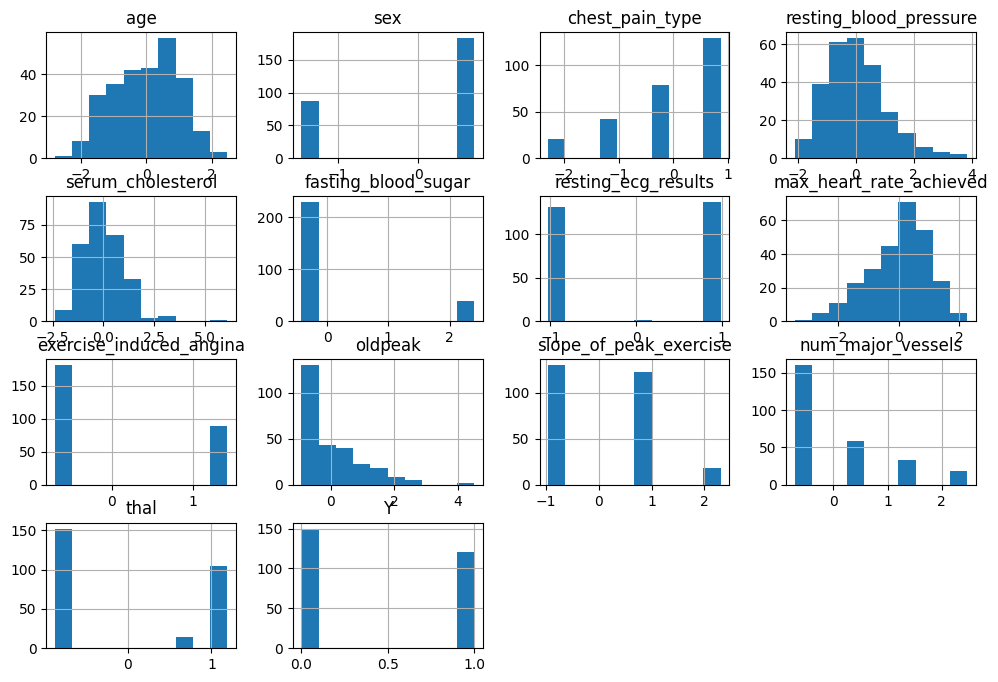

In [ ]:
df.hist(figsize=(12, 8))
plt.show()

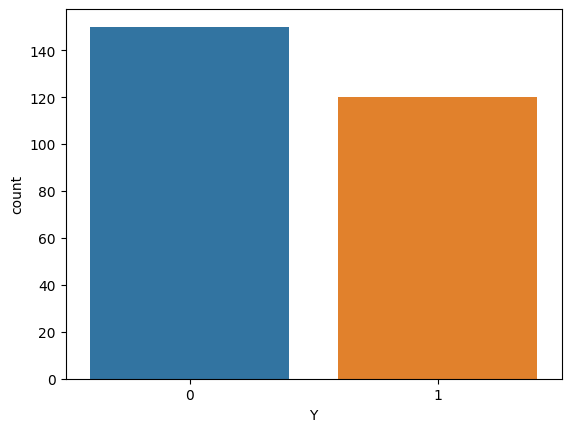

In [ ]:
sns.countplot(data=df, x='Y')
plt.show()

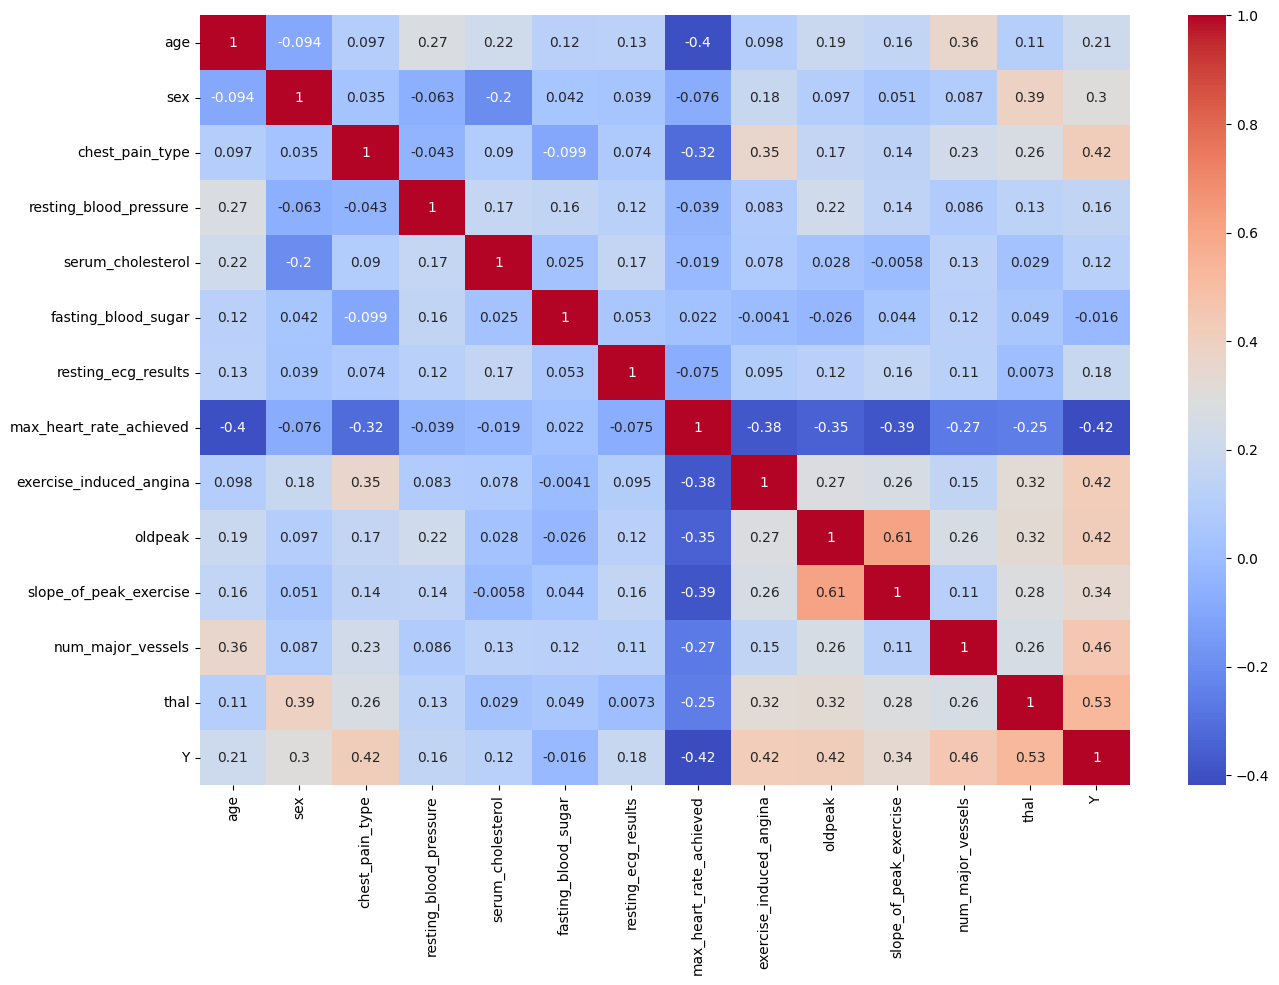

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

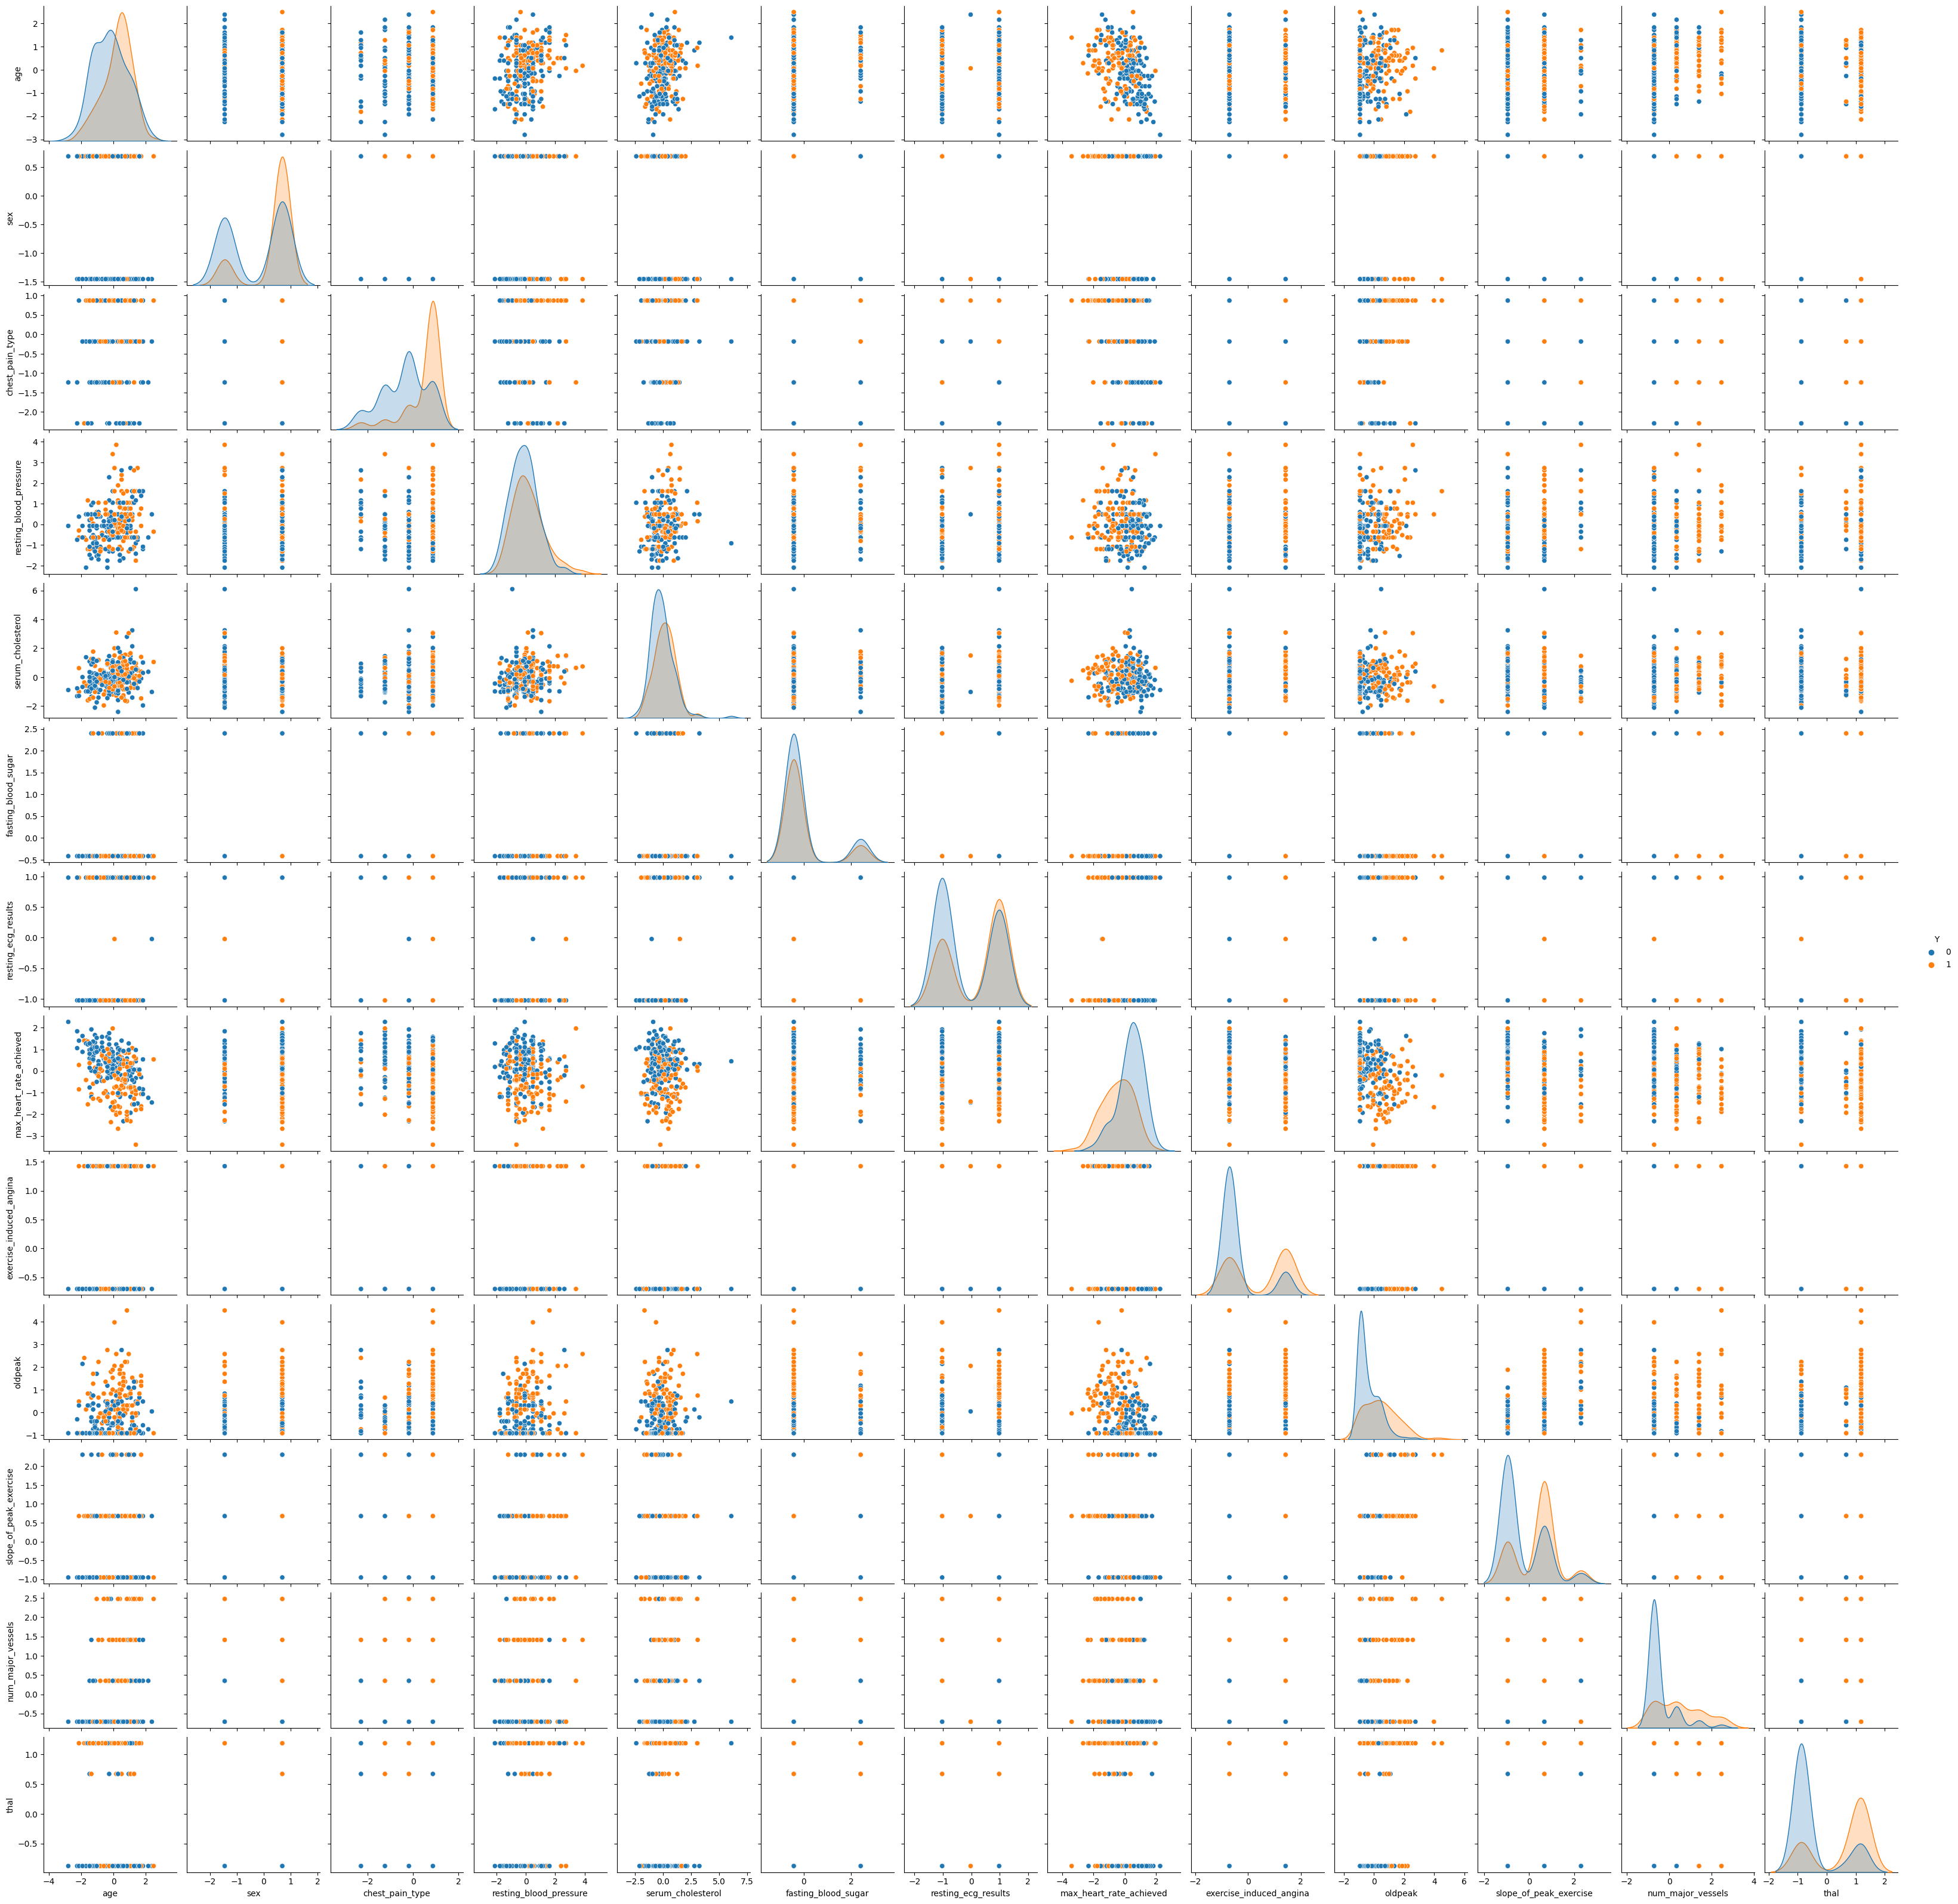

In [ ]:
sns.pairplot(df, hue='Y')
plt.show()

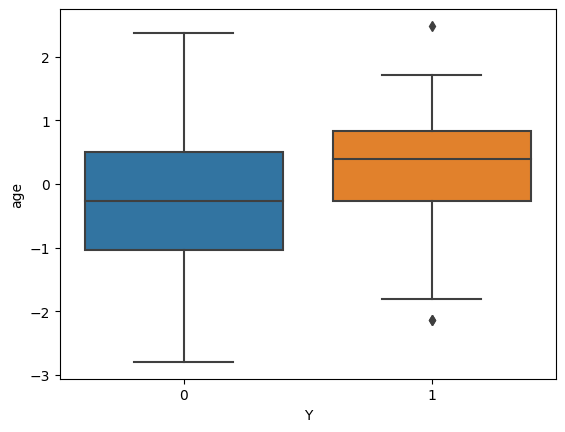

In [ ]:
sns.boxplot(data=df, x='Y', y='age')
plt.show()